#### 1. eLearning http://cyber.inu.ac.kr에 업로드된 armybody.csv “대한민국 육군 신체 측정 데이터”에 대하여 몸무게를 입력하면 허리둘레를 예측할 수 있는 데이터 분석 모델을 구현하고 아래 각 항목에 대하여 답하세요.

In [1]:
# 넘파이와 파이토치를 불러옵니다.
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있습니다. (ex. Linear, Convolution, RNN 등등)
import torch.nn as nn           

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있습니다 (ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화 하는 함수들이 들어가 있습니다. (ex. uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt
import pandas

In [2]:
f = open("./data/armybody.csv", 'r')
data = f.read()
f.close
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:len(lines)-1]
print(header)
print(len(lines))
print(lines[0])

['순번', '측정 일자', '가슴 둘레 센티미터', '소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램']
135670
1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2


<br/>

① 데이터 세트의 차원 형태(dimension shape)를 출력해 보세요.

In [3]:
info = pandas.read_csv("./data/armybody.csv",  encoding='euc-kr')
info_df = info
info_df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
135665,135666,20160704,106.8,89.7,179.1,100.5,82.5,61.3,27.8,90.9
135666,135667,20160704,112.0,88.8,176.5,111.5,85.8,61.3,27.0,104.2
135667,135668,20160704,117.7,92.2,184.2,107.3,87.5,61.4,27.7,110.0
135668,135669,20160704,91.5,90.0,180.9,87.7,80.2,61.5,27.3,74.1


In [4]:
weight = info.iloc[:,9] # 몸무게
round = info.iloc[:,5] # 허리둘레

x = torch.FloatTensor(np.array(weight))
y = torch.FloatTensor(np.array(round))

print(weight.shape)
print(round.shape)

(135670,)
(135670,)


#### 135670 x 1 데이터이다.
#### 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개이다.

<br/>

② 2차원 평면에 몸무게와 허리둘레 데이터 포인트들을 가시화 해보세요.

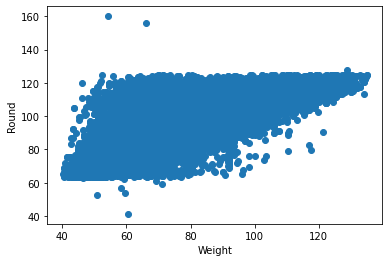

In [5]:
weight = info.iloc[:,9] # 몸무게
round = info.iloc[:,5] # 허리둘레

plt.scatter(weight, round)
plt.xlabel("Weight")
plt.ylabel("Round")
plt.show()

<br/>

③ 데이터 세트 중 100,000개를 학습 세트로 하고 나머지를 테스트 세트로 나누고 각 세트의 마지막 데이터를 출력해보세요.

In [6]:
def split_train_test(data, train_set_size):
    np.random.seed(1) 
    shuffled_indices = np.random.permutation(len(data)) 
    train_indices = shuffled_indices[:train_set_size]
    test_indices = shuffled_indices[train_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(info, 100000)
print("학습 세트 수:",len(train_set), ", 테스트 세트 수:", len(test_set))
print(type(train_set))
print(type(info))

print()
print(train_set.iloc[-1]) # 학습 세트 마지막 데이터

print()
print(test_set.iloc[-1]) # 테스트 세트 마지막 데이터

학습 세트 수: 100000 , 테스트 세트 수: 35670
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>

순번                8225.0
측정 일자         20140120.0
가슴 둘레 센티미터          91.3
소매길이 센티미터           84.4
신장 센티미터            168.6
허리 둘레 센티미터          79.0
샅높이 센티미터            75.4
머리 둘레 센티미터          57.1
발 길이 센티미터           24.6
몸무게 킬로그램            66.5
Name: 8224, dtype: float64

순번              128038.0
측정 일자         20160607.0
가슴 둘레 센티미터          97.9
소매길이 센티미터           87.8
신장 센티미터            176.0
허리 둘레 센티미터          90.3
샅높이 센티미터            82.9
머리 둘레 센티미터          56.3
발 길이 센티미터           25.5
몸무게 킬로그램            74.7
Name: 128037, dtype: float64


In [ ]:
# 참고 - 비율로 분할하기 (랜덤 분할)
def split_train_test(data, test_ratio):
#   np.random.seed() 
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), len(test_set))

<br/>

④ 선형회귀(linear regression) 모델을 설계하고 학습 모델의 구성하고 각 계층별 요약과 파라미터 수를 출력해 보세요.

In [7]:
model = nn.Sequential(
          nn.Linear(1,1),
          nn.ReLU(),
)

In [8]:
# gpu가 사용 가능한 경우에는 device를 0번 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 자녀 노드의 이름과 모듈을 출력합니다.
for i in model.named_children():
    print(i)

cuda:0
('0', Linear(in_features=1, out_features=1, bias=True))
('1', ReLU())


<br/>

⑤ 에포크를 1000, 학습률 0.001로 튜닝하고 테스트 데이터로 에포크별 MAE(mean absolute error) 손실을 평가하여 그래프로 그려보세요.

- Series 형을 Tensor 형으로 변환

In [9]:
# 데이터 전처리

train_weight_data = train_set.iloc[:,9]
train_round_data = train_set.iloc[:,5]
test_weight_data = test_set.iloc[:,9]
test_round_data = test_set.iloc[:,5]

x = np.array(train_weight_data).reshape(len(train_weight_data), 1)
y = np.array(train_round_data).reshape(len(train_round_data), 1)

print("x =", x[:10])
print("x =", y[:10])
print(x.shape)
print(y.shape)

x = [[ 54.5]
 [ 57.5]
 [ 68.1]
 [121.2]
 [ 77.6]
 [ 70.7]
 [ 69.4]
 [ 70.6]
 [ 71.1]
 [103.7]]
x = [[ 73.9]
 [ 71.1]
 [ 82.7]
 [120.5]
 [ 87.8]
 [ 89. ]
 [ 83.5]
 [ 86.7]
 [ 86.9]
 [109.2]]
(100000, 1)
(100000, 1)


In [10]:
model = nn.Linear(1,1)

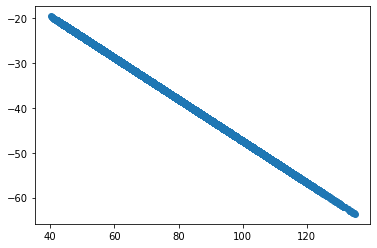

tensor(120.8538)


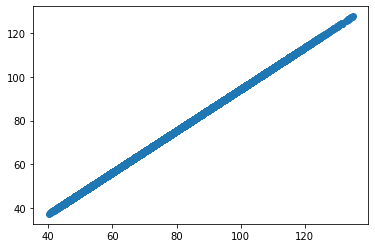

tensor(18.5822)


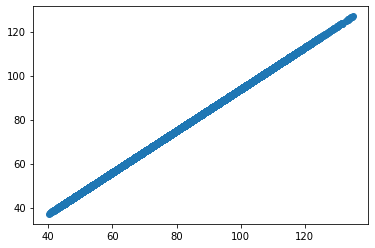

tensor(18.9643)


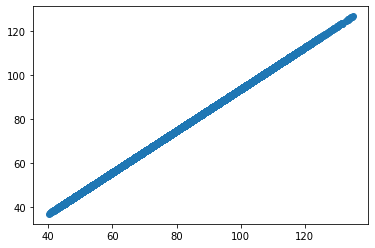

tensor(19.0286)


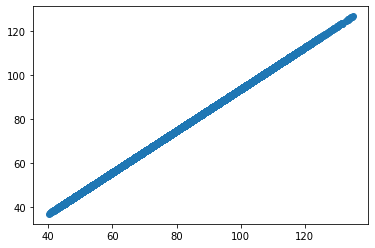

tensor(19.0348)


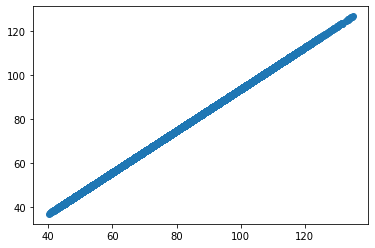

tensor(19.0346)


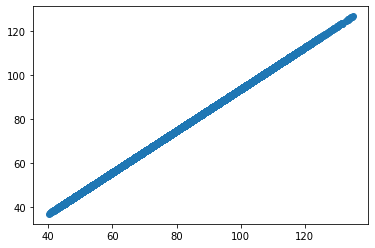

tensor(19.0343)


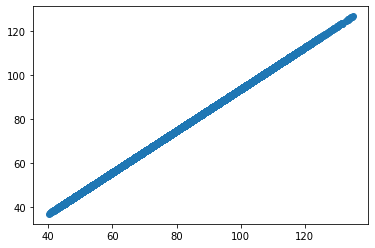

tensor(19.0341)


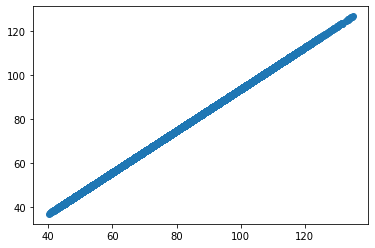

tensor(19.0339)


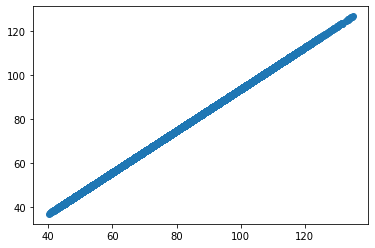

tensor(19.0353)


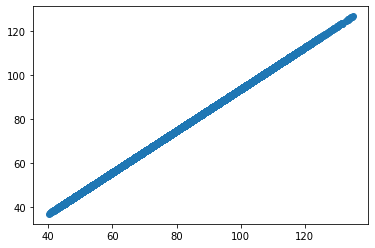

tensor(19.0351)


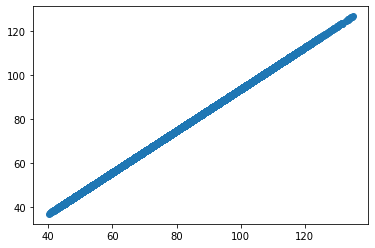

tensor(19.0349)


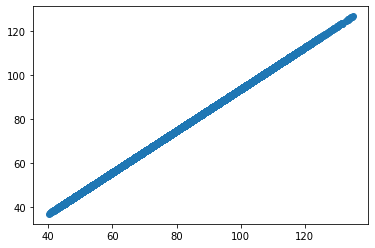

tensor(19.0346)


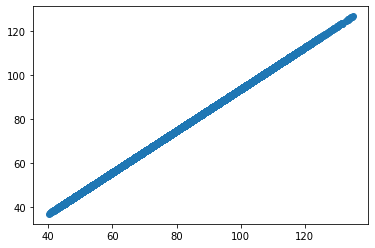

tensor(19.0344)


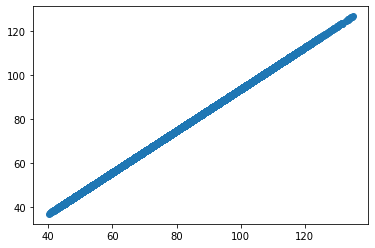

tensor(19.0341)


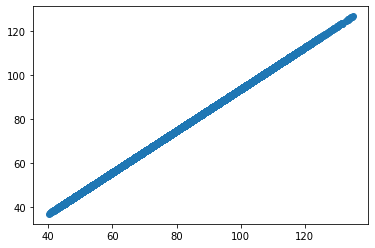

tensor(19.0339)


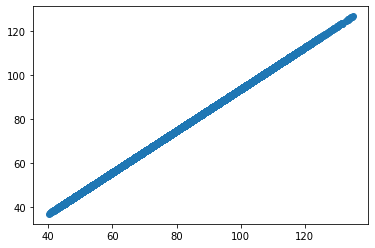

tensor(19.0337)


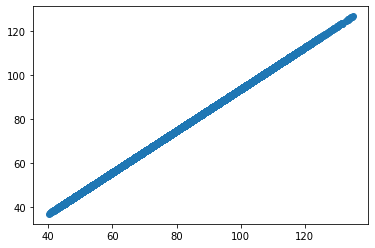

tensor(19.0334)


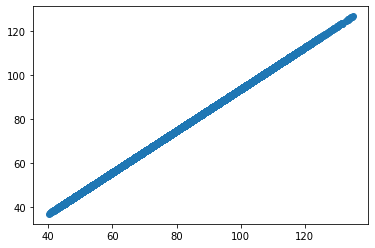

tensor(19.0332)


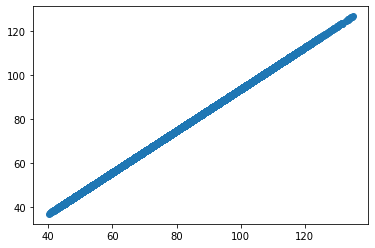

tensor(19.0330)


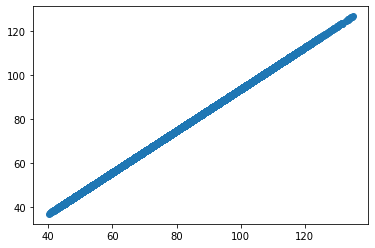

tensor(19.0327)


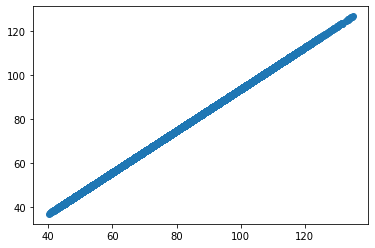

tensor(19.0325)


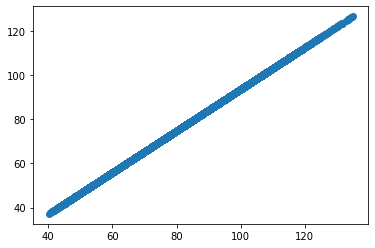

tensor(19.0322)


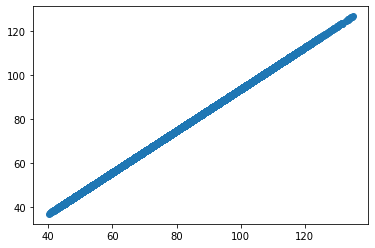

tensor(19.0337)


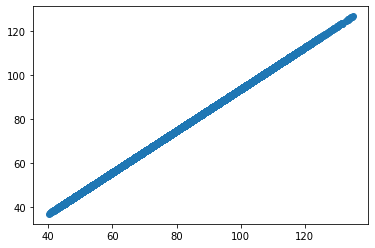

tensor(19.0335)


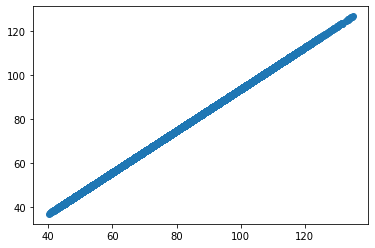

tensor(19.0332)


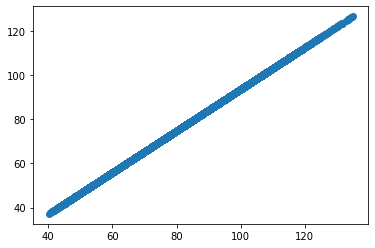

tensor(19.0321)


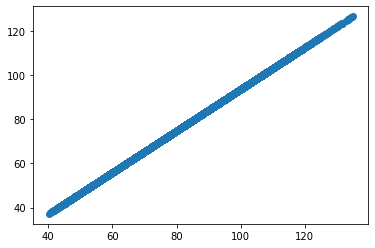

tensor(19.0319)


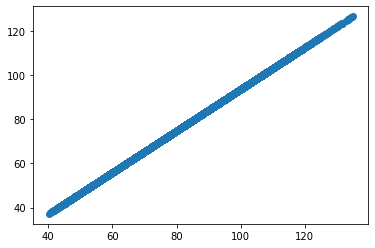

tensor(19.0317)


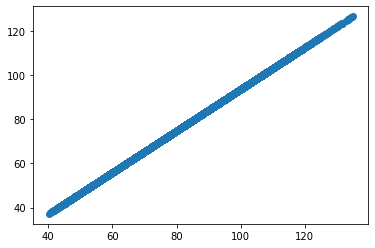

tensor(19.0314)


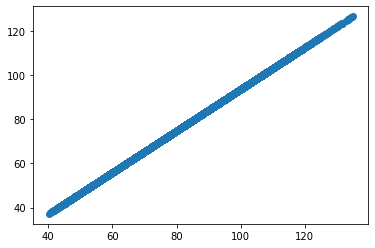

tensor(19.0329)


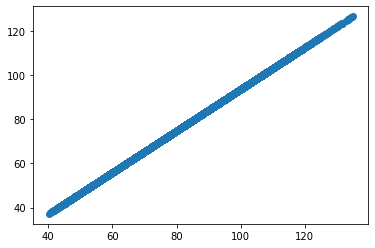

tensor(19.0327)


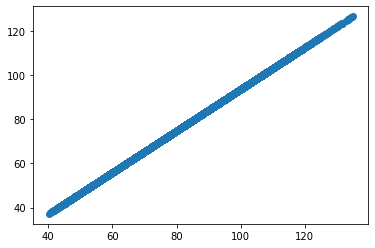

tensor(19.0324)


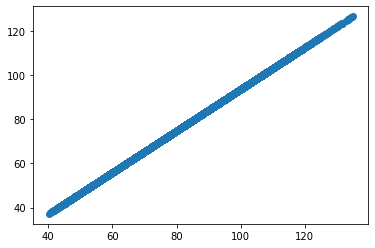

tensor(19.0322)


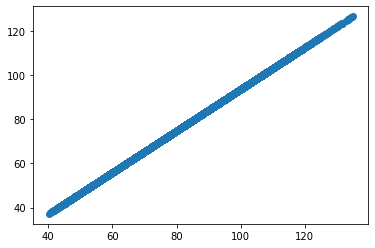

tensor(19.0319)


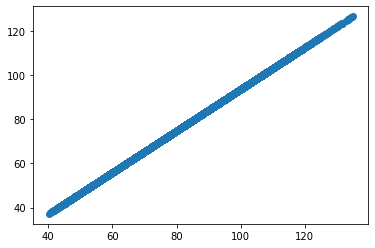

tensor(19.0317)


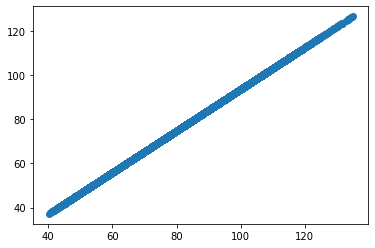

tensor(19.0315)


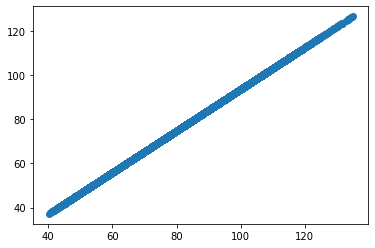

tensor(19.0312)


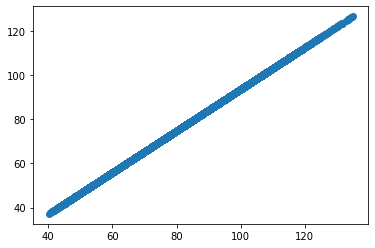

tensor(19.0310)


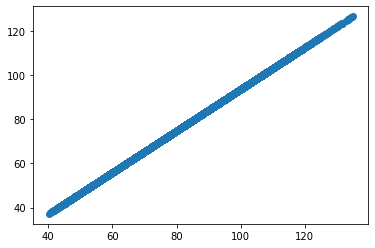

tensor(19.0308)


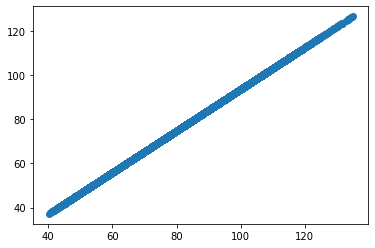

tensor(19.0305)


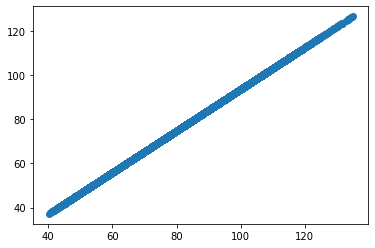

tensor(19.0303)


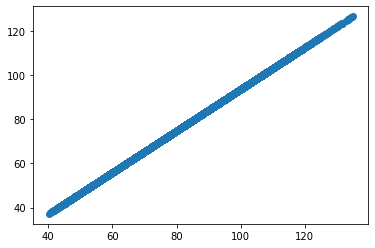

tensor(19.0300)


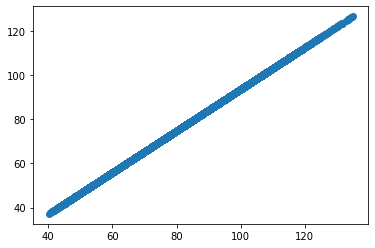

tensor(19.0298)


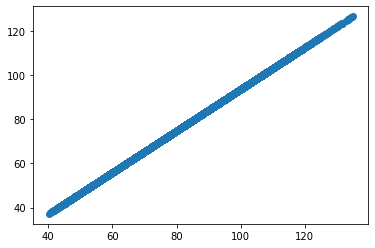

tensor(19.0296)


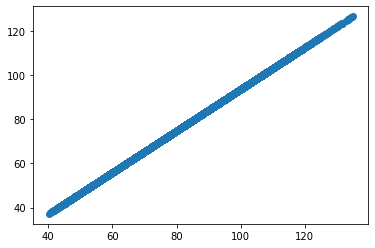

tensor(19.0310)


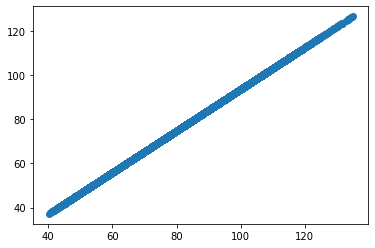

tensor(19.0308)


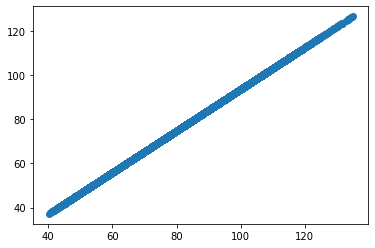

tensor(19.0306)


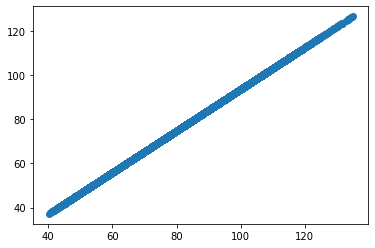

tensor(19.0303)


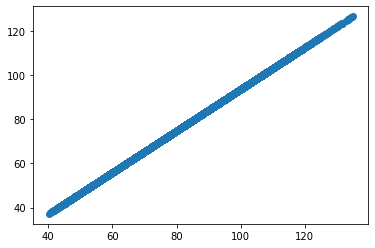

tensor(19.0301)


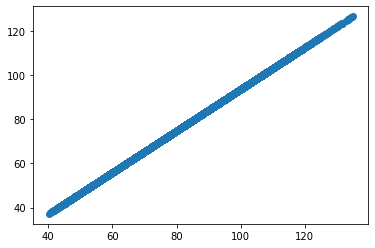

tensor(19.0314)


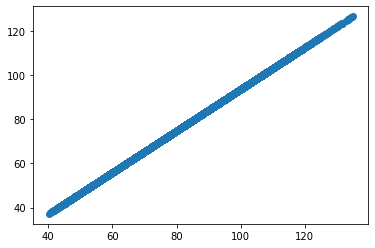

tensor(19.0294)


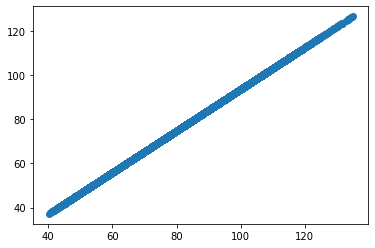

tensor(19.0292)


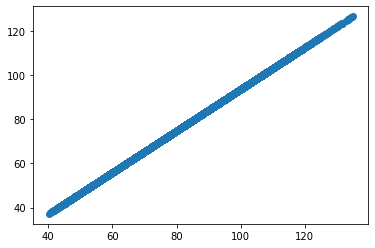

tensor(19.0304)


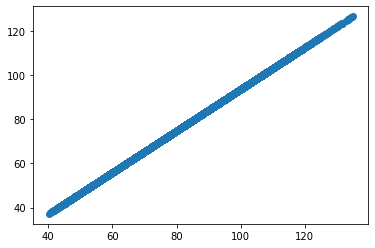

tensor(19.0285)


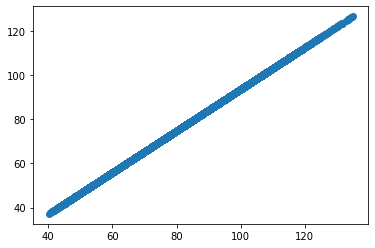

tensor(19.0298)


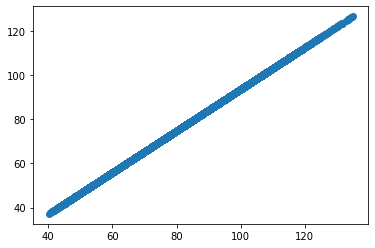

tensor(19.0293)


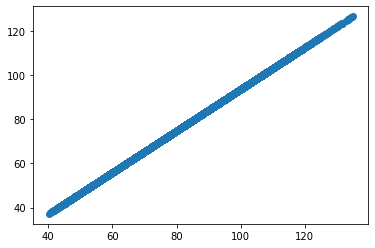

tensor(19.0306)


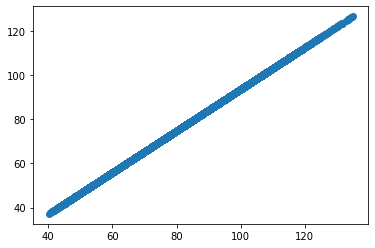

tensor(19.0286)


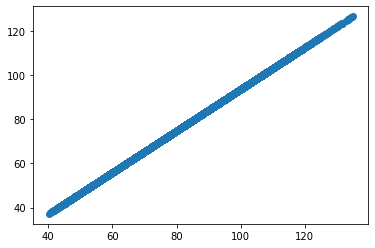

tensor(19.0282)


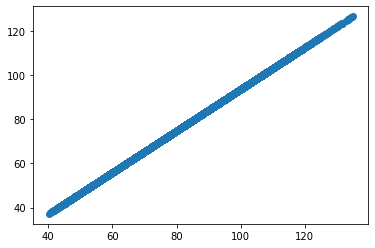

tensor(19.0295)


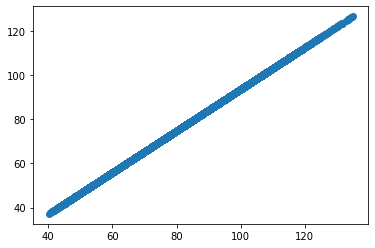

tensor(19.0292)


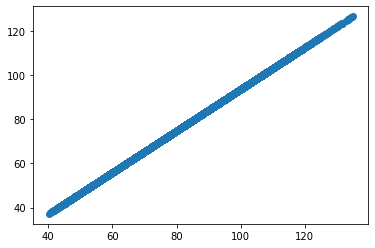

tensor(19.0288)


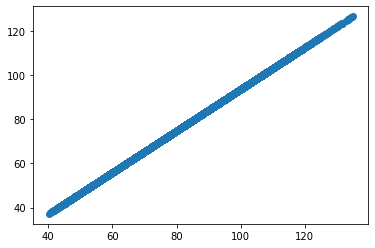

tensor(19.0301)


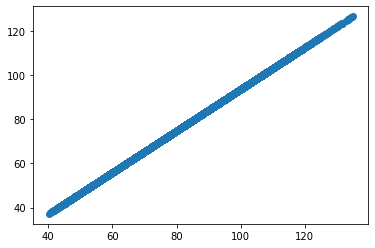

tensor(19.0281)


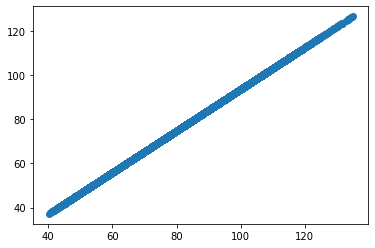

tensor(19.0277)


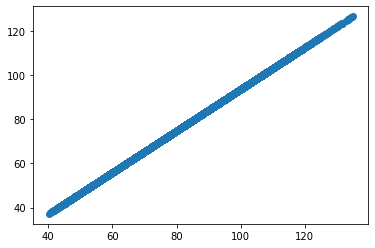

tensor(19.0289)


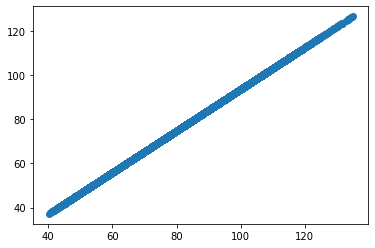

tensor(19.0270)


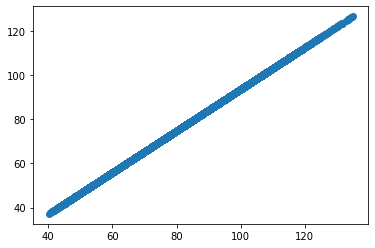

tensor(19.0283)


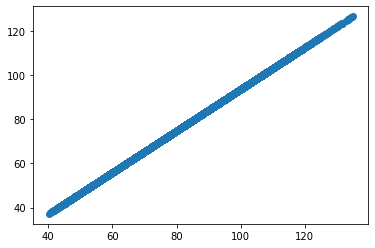

tensor(19.0278)


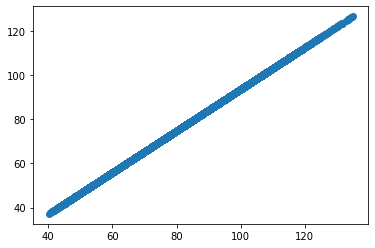

tensor(19.0274)


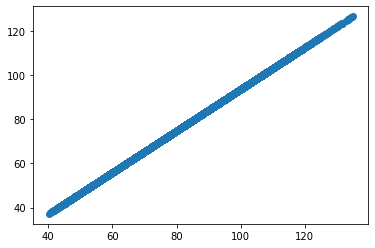

tensor(19.0270)


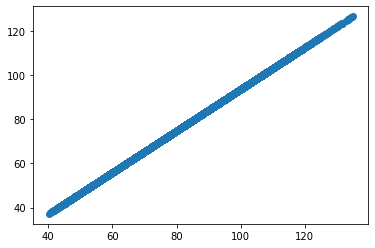

tensor(19.0265)


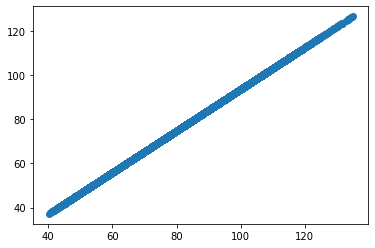

tensor(19.0278)


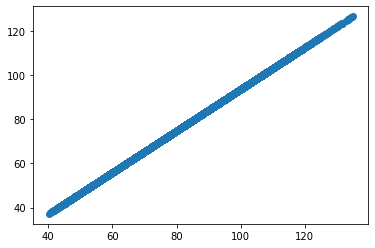

tensor(19.0273)


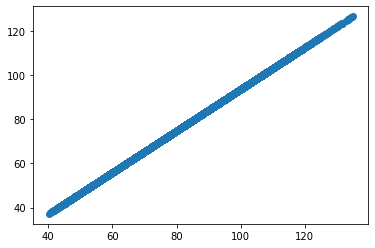

tensor(19.0269)


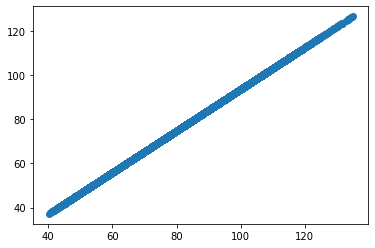

tensor(19.0265)


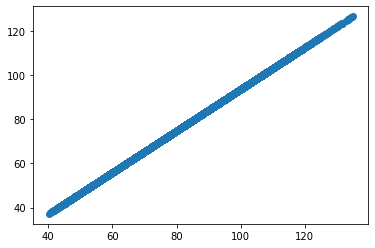

tensor(19.0275)


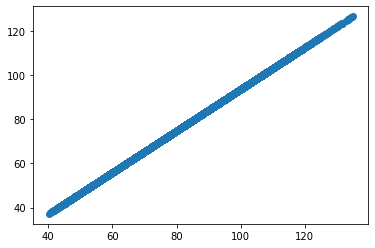

tensor(19.0271)


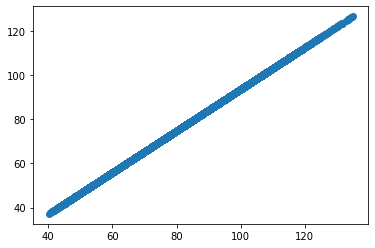

tensor(19.0267)


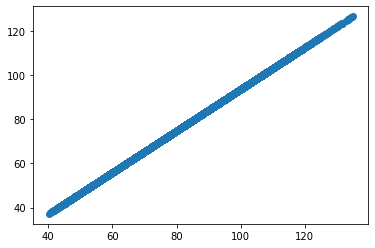

tensor(19.0262)


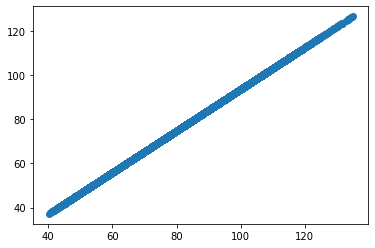

tensor(19.0258)


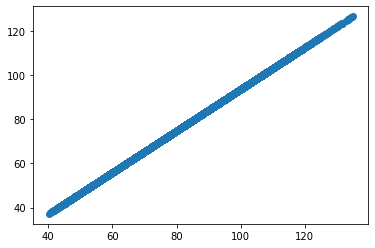

tensor(19.0254)


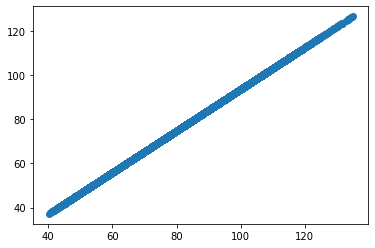

tensor(19.0264)


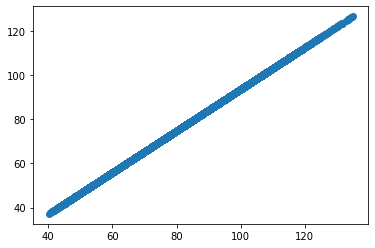

tensor(19.0258)


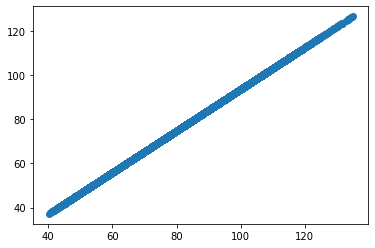

tensor(19.0254)


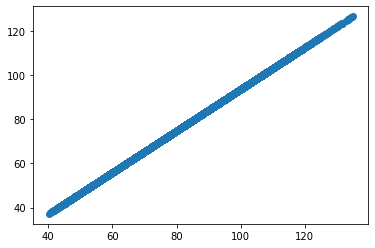

tensor(19.0256)


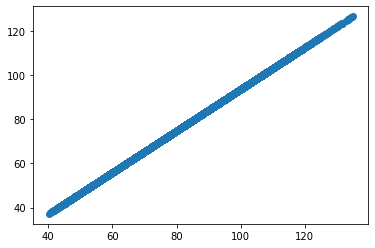

tensor(19.0252)


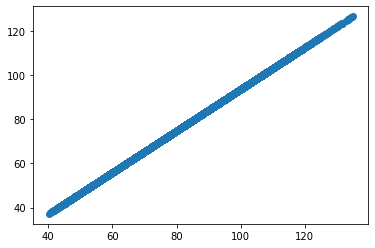

tensor(19.0260)


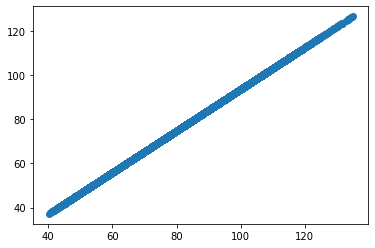

tensor(19.0271)


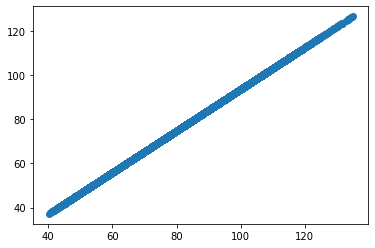

tensor(19.0250)


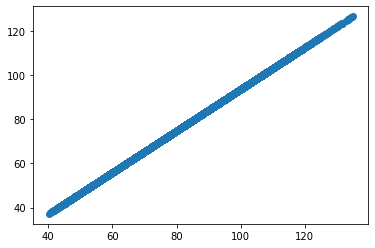

tensor(19.0259)


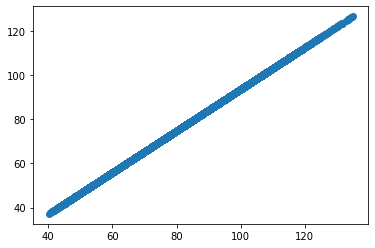

tensor(19.0254)


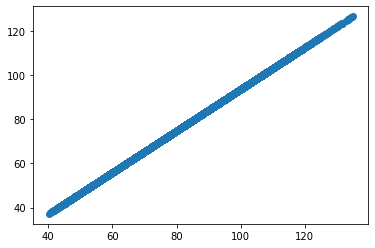

tensor(19.0248)


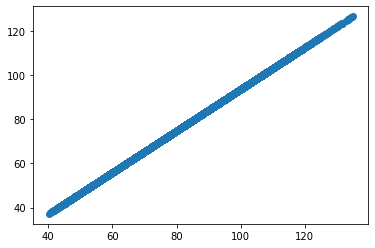

tensor(19.0259)


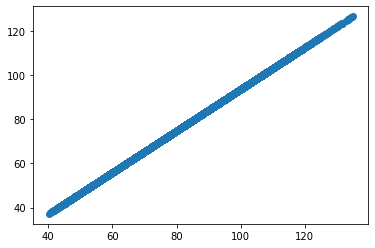

tensor(19.0252)


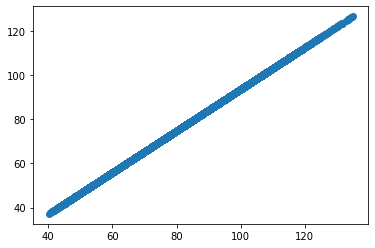

tensor(19.0246)


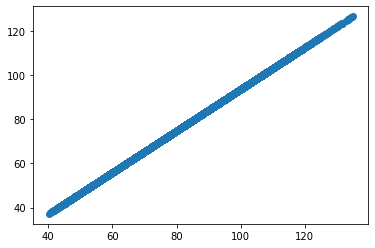

tensor(19.0242)


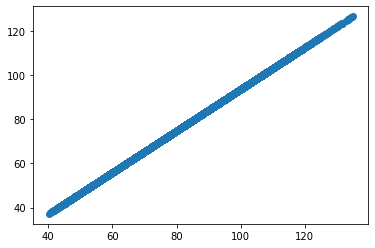

tensor(19.0251)


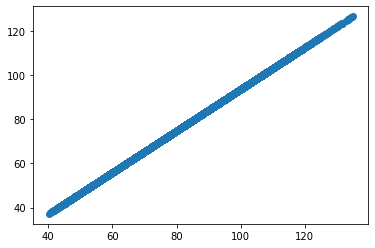

tensor(19.0262)


In [11]:
num_data = len(train_set)
num_epoch = 1000
lr = 0.001

# x 좌표는 몸무게
# y 좌표는 허리둘레
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어줍니다. 
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)
label = y + noise

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

loss_arr = []
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

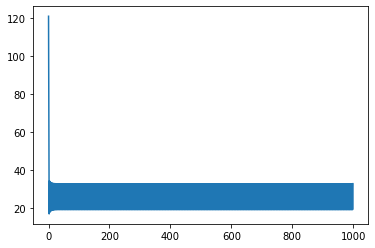

In [12]:
plt.plot(loss_arr)
plt.show()

<br/>

⑥ 손실함수로 MSE(mean squared error)를 사용해도 성능이 잘 나오도록 튜닝해 보세요.

In [ ]:
model = nn.Sequential(
          nn.Linear(1,1),
          nn.ReLU(),
)

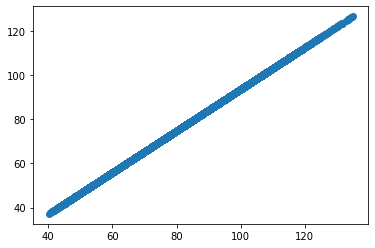

tensor(402.5155)


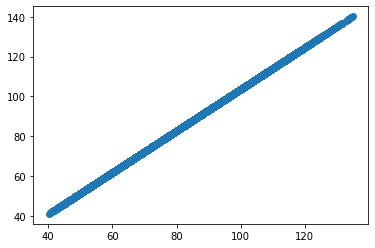

tensor(191.8870)


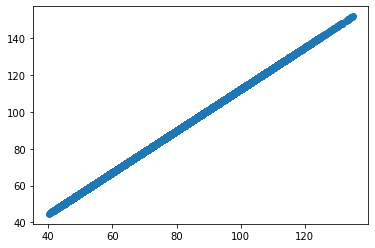

tensor(95.3567)


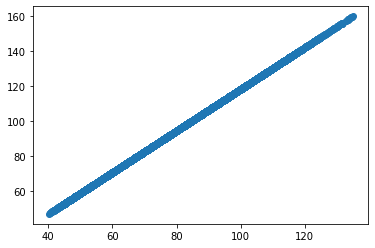

tensor(76.0199)


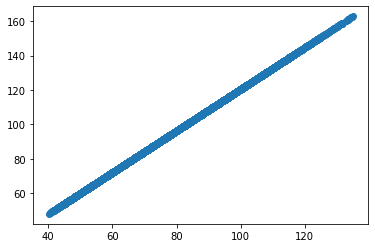

tensor(78.6247)


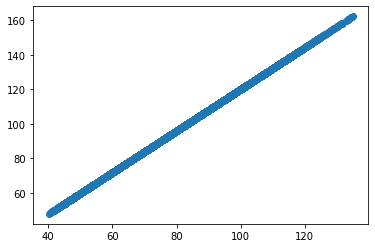

tensor(77.8031)


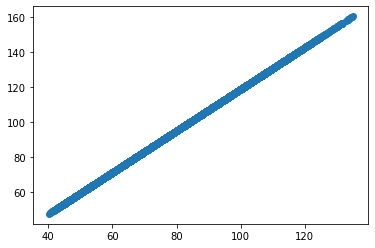

tensor(76.0916)


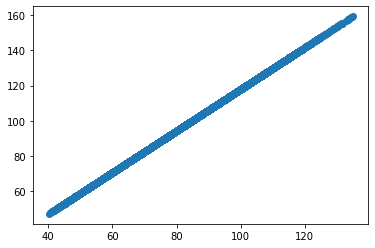

tensor(75.9053)


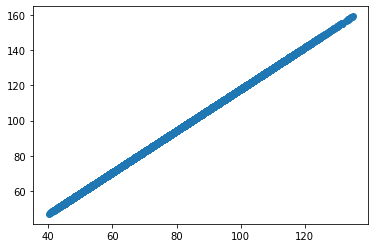

tensor(75.9043)


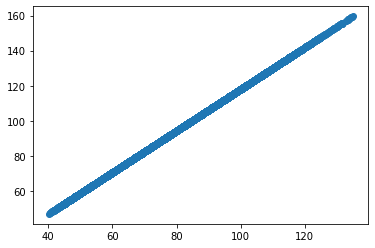

tensor(75.7811)


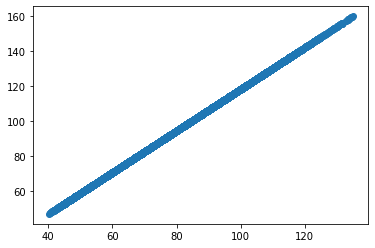

tensor(75.7199)


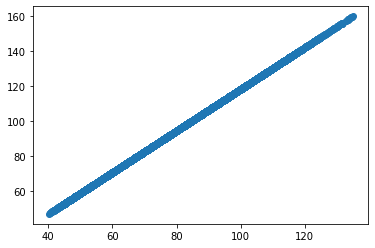

tensor(75.6677)


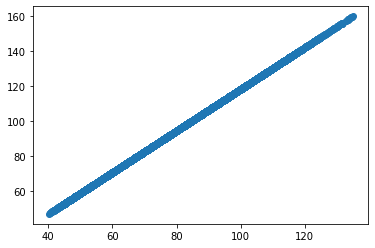

tensor(75.6073)


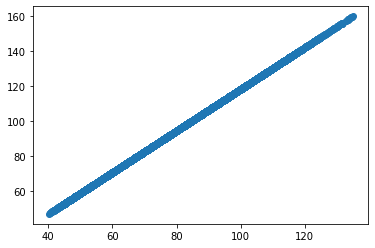

tensor(75.5482)


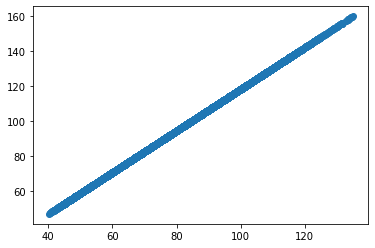

tensor(75.4869)


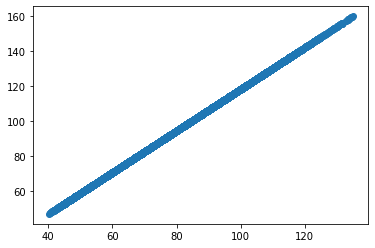

tensor(75.4233)


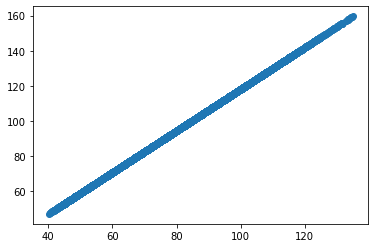

tensor(75.3579)


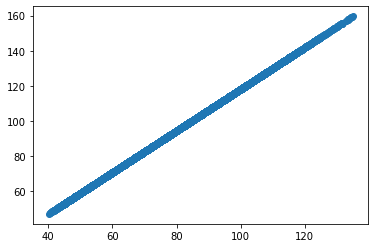

tensor(75.2904)


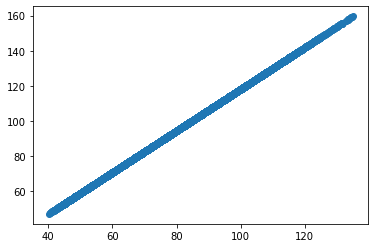

tensor(75.2210)


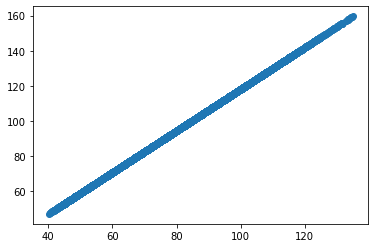

tensor(75.1498)


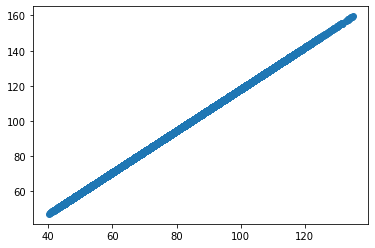

tensor(75.0768)


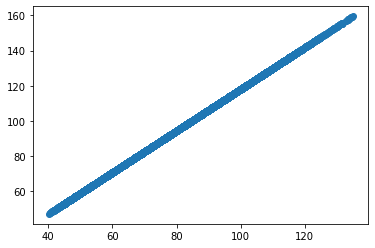

tensor(75.0021)


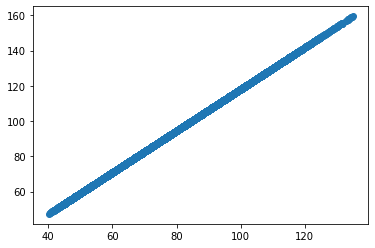

tensor(74.9256)


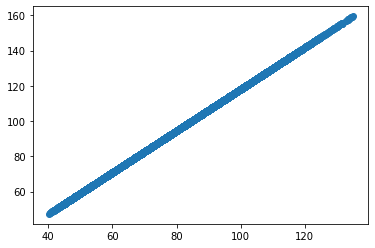

tensor(74.8476)


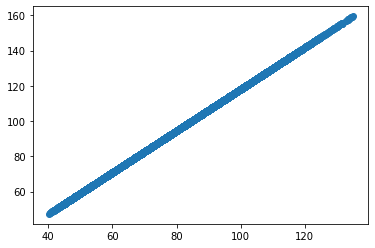

tensor(74.7679)


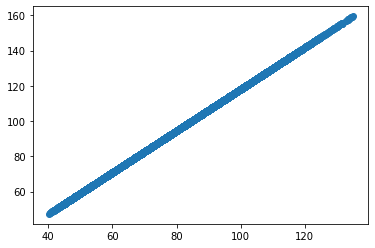

tensor(74.6868)


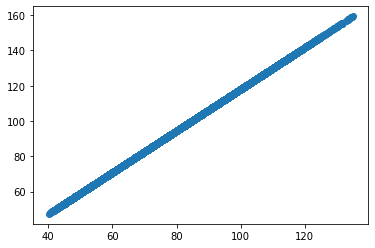

tensor(74.6041)


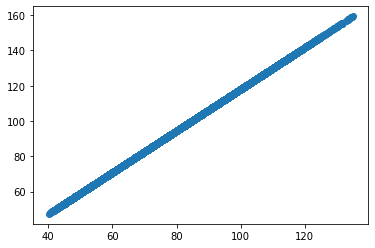

tensor(74.5200)


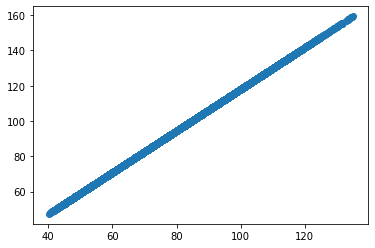

tensor(74.4344)


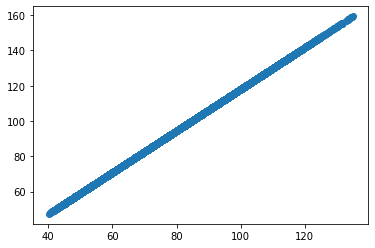

tensor(74.3475)


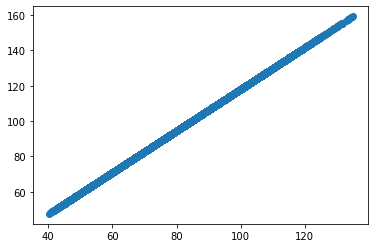

tensor(74.2593)


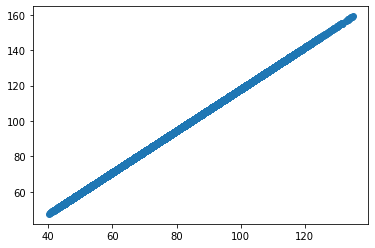

tensor(74.1697)


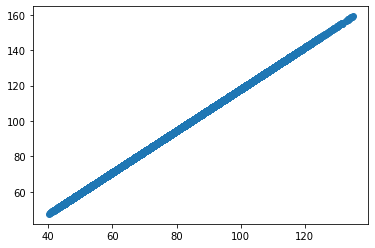

tensor(74.0789)


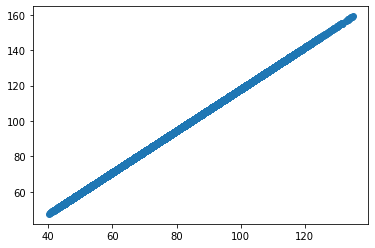

tensor(73.9868)


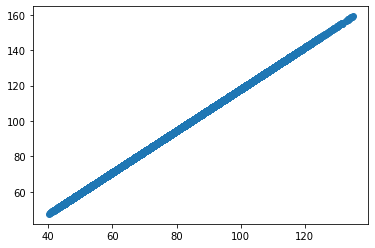

tensor(73.8935)


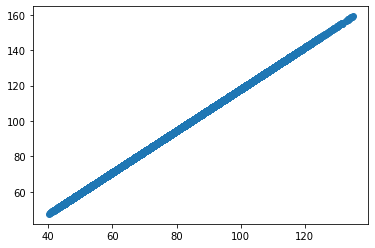

tensor(73.7990)


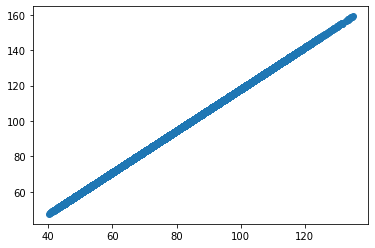

tensor(73.7034)


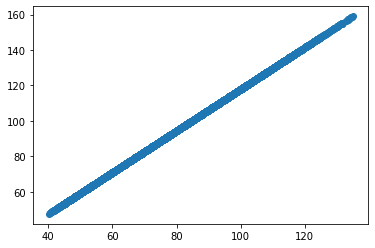

tensor(73.6066)


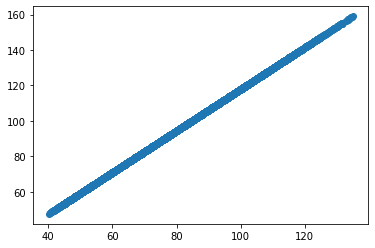

tensor(73.5087)


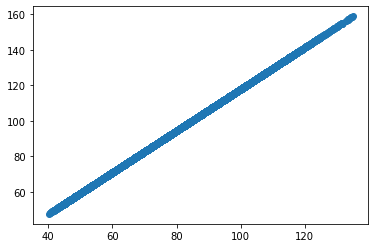

tensor(73.4098)


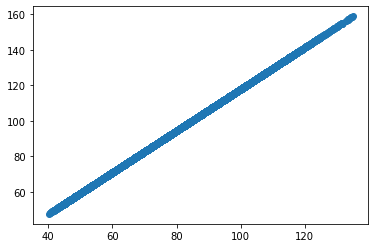

tensor(73.3098)


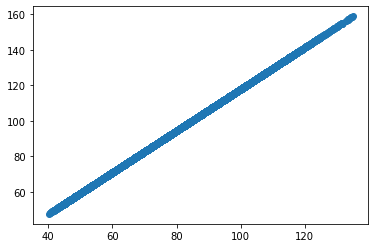

tensor(73.2088)


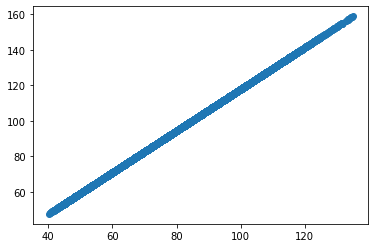

tensor(73.1067)


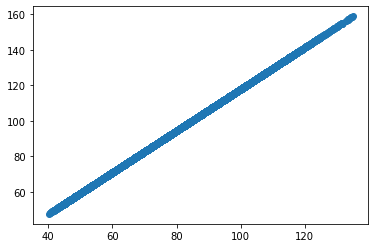

tensor(73.0037)


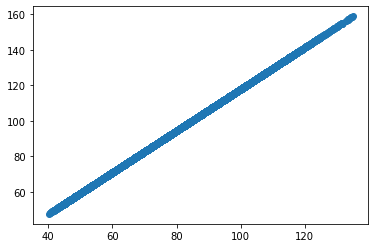

tensor(72.8998)


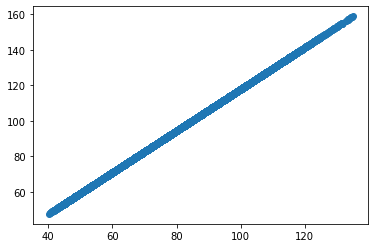

tensor(72.7949)


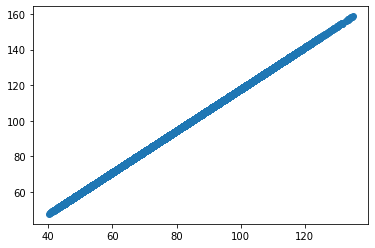

tensor(72.6891)


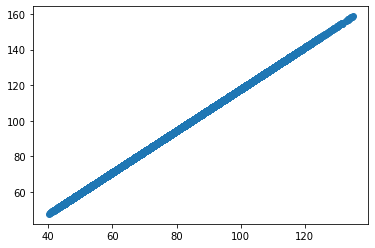

tensor(72.5824)


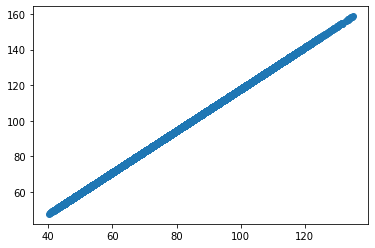

tensor(72.4748)


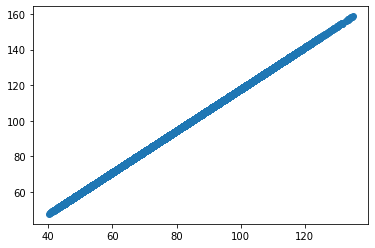

tensor(72.3664)


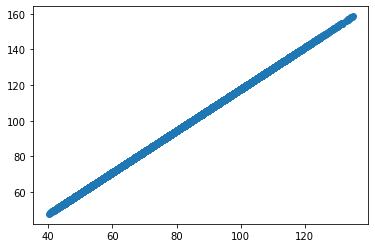

tensor(72.2571)


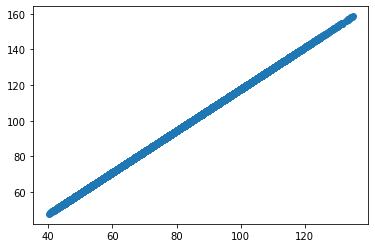

tensor(72.1471)


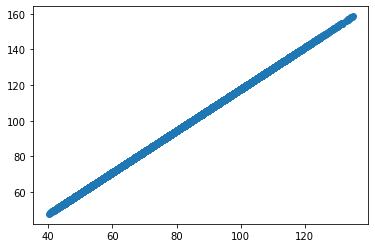

tensor(72.0362)


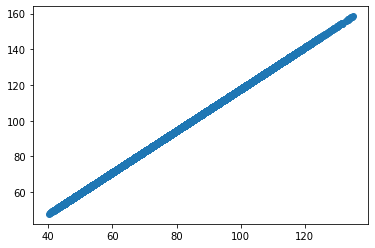

tensor(71.9246)


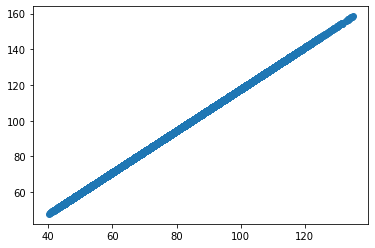

tensor(71.8122)


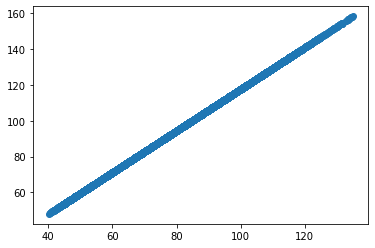

tensor(71.6991)


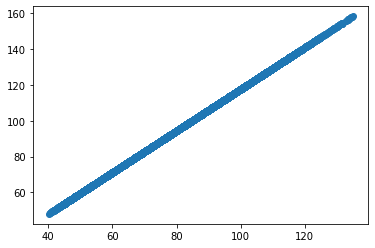

tensor(71.5852)


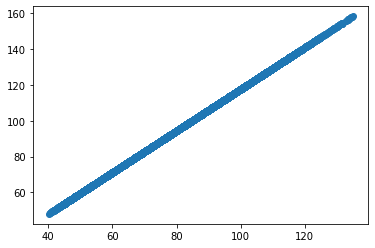

tensor(71.4707)


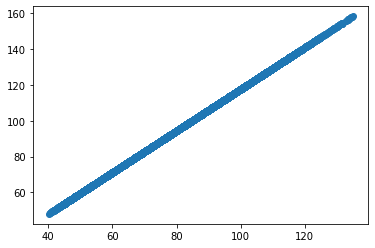

tensor(71.3554)


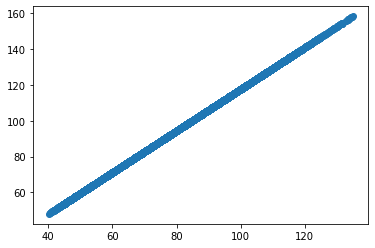

tensor(71.2395)


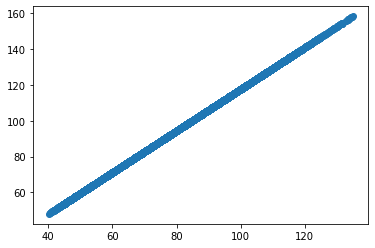

tensor(71.1229)


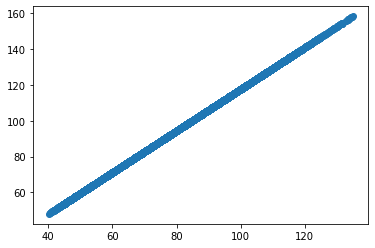

tensor(71.0057)


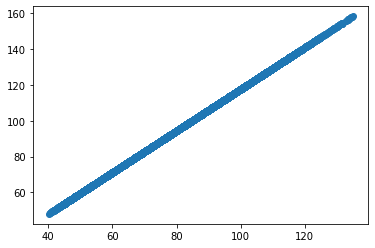

tensor(70.8879)


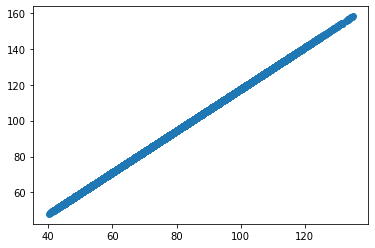

tensor(70.7694)


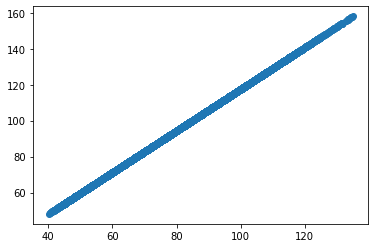

tensor(70.6504)


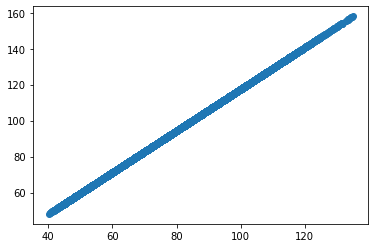

tensor(70.5308)


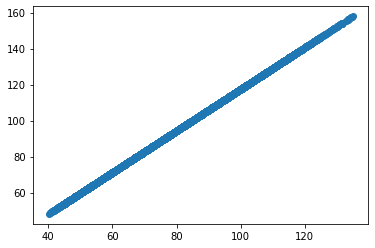

tensor(70.4106)


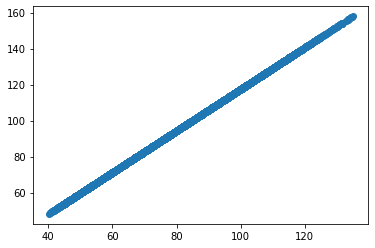

tensor(70.2899)


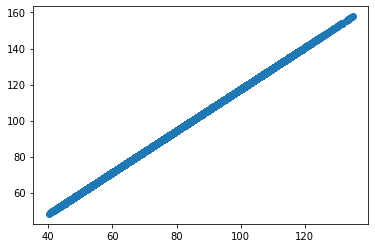

tensor(70.1686)


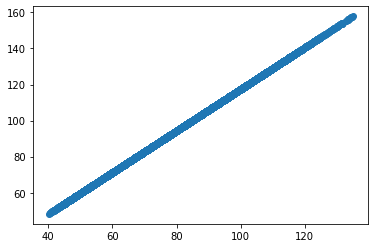

tensor(70.0468)


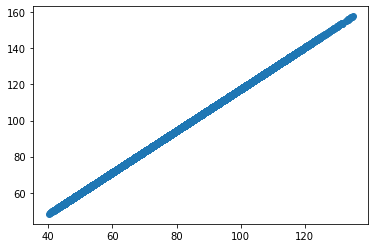

tensor(69.9245)


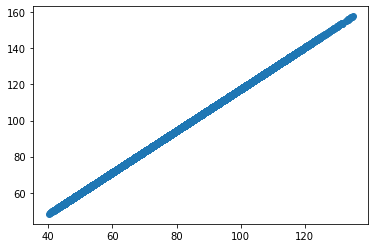

tensor(69.8017)


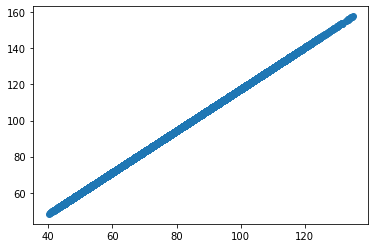

tensor(69.6784)


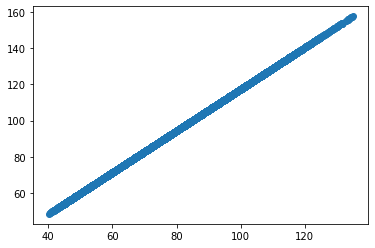

tensor(69.5547)


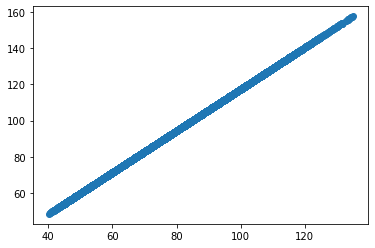

tensor(69.4305)


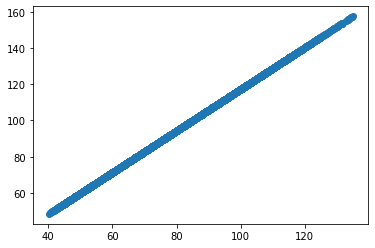

tensor(69.3058)


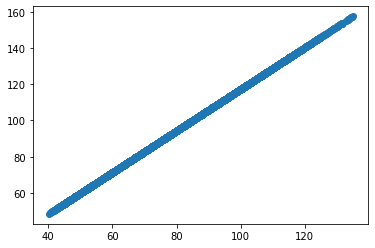

tensor(69.1807)


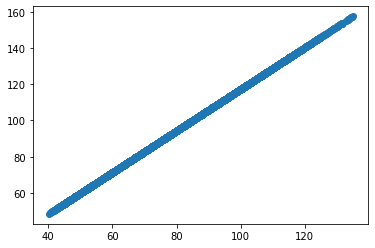

tensor(69.0552)


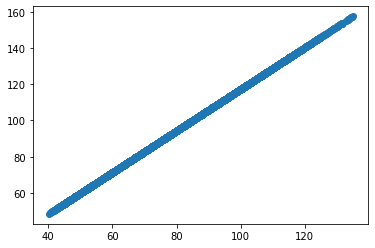

tensor(68.9293)


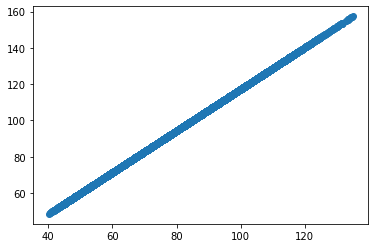

tensor(68.8030)


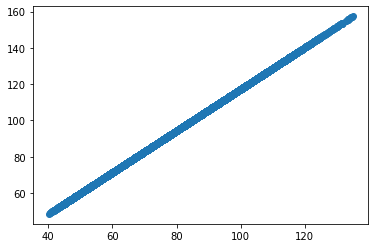

tensor(68.6763)


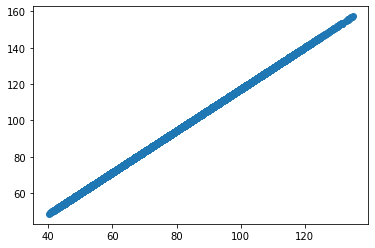

tensor(68.5492)


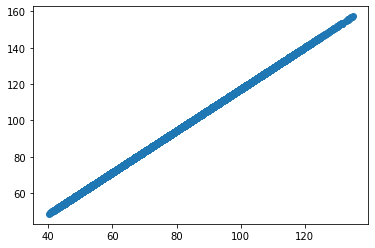

tensor(68.4218)


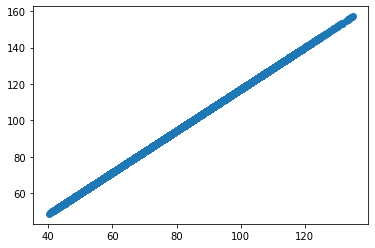

tensor(68.2940)


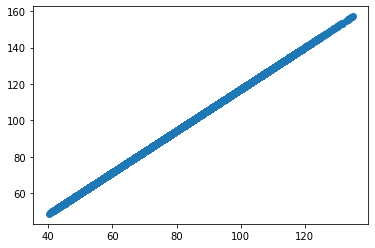

tensor(68.1659)


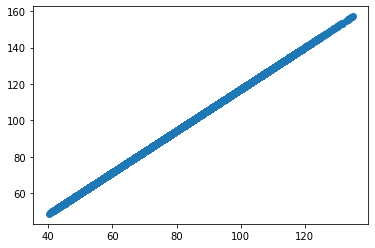

tensor(68.0375)


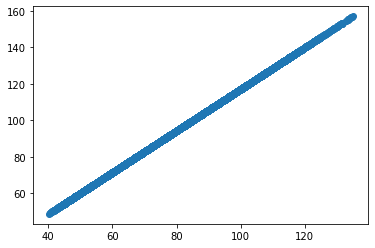

tensor(67.9087)


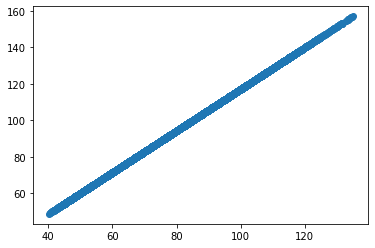

tensor(67.7796)


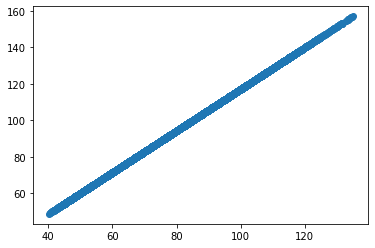

tensor(67.6503)


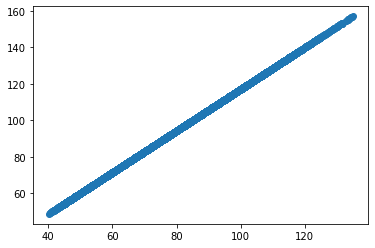

tensor(67.5207)


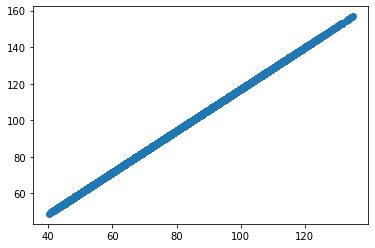

tensor(67.3907)


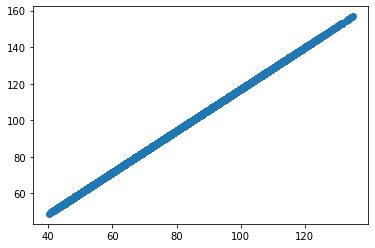

tensor(67.2605)


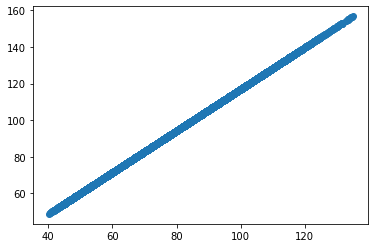

tensor(67.1301)


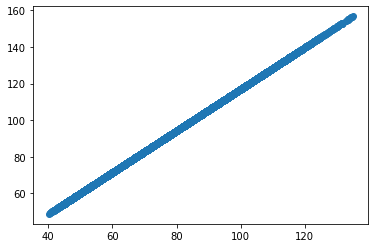

tensor(66.9994)


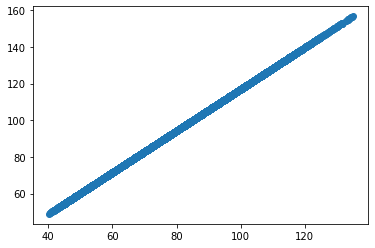

tensor(66.8685)


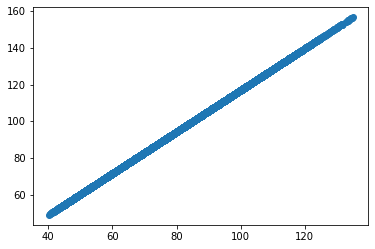

tensor(66.7373)


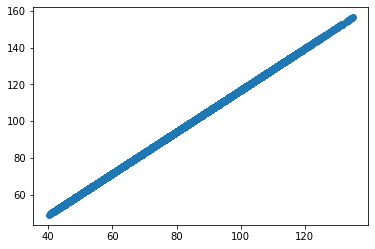

tensor(66.6059)


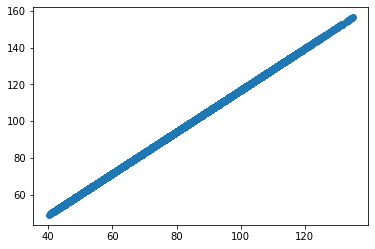

tensor(66.4743)


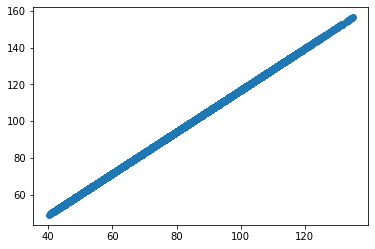

tensor(66.3426)


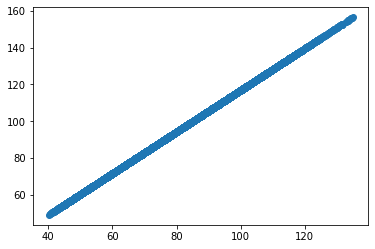

tensor(66.2106)


In [13]:
num_data = len(train_set)
num_epoch = 1000
lr = 0.001

# x 좌표는 몸무게
# y 좌표는 허리둘레
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어줍니다. 
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)
label = y + noise

loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

loss_arr = []
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

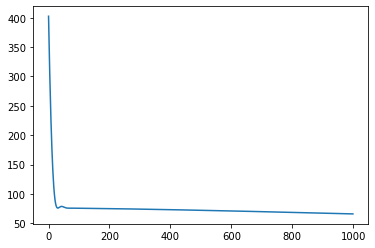

In [14]:
plt.plot(loss_arr)
plt.show()